# Exercícios de Modelagem - Dados de Reclamações

Resolva os exercícios propostos abaixo.

## Leitura e análise inicial dos dados

Abra o arquivo `../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv` que você criou no exercício de Limpeza de Dados e faça as exibições iniciais do conteúdo.

In [1]:
#importing libraries
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

%matplotlib inline

# lê o arquivo CSV
df = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv')

df.head(3)

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE
0,2016-09-12,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,1,19
1,2016-12-11,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45
2,2017-11-01,12:11:12,CRM-AF/SMS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,12,60


## Análise Estatística

Analise a diferença entre idades de homens e mulheres no dataset. A diferença é estatisticamente significativa?

In [2]:
import statsmodels.stats.api as sms

df_M = df[df['SEXO']=='M']
df_F = df[df['SEXO']=='F']

media = df_M['IDADE'].mean()
intervalo = sms.DescrStatsW(df_M['IDADE']).tconfint_mean()
print("Média M: ", media, "Intervalo M: ", intervalo)

media = df_F['IDADE'].mean()
intervalo = sms.DescrStatsW(df_F['IDADE']).tconfint_mean()
print("Média F: ", media, "Intervalo F: ", intervalo)

Média M:  47.60548523206751 Intervalo M:  (47.13140787394375, 48.079562590191266)
Média F:  48.700958286358514 Intervalo F:  (48.223961736543714, 49.17795483617331)


In [3]:
cm = sms.CompareMeans(sms.DescrStatsW(df_M['IDADE']), sms.DescrStatsW(df_F['IDADE']))
cm.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-1.0955,0.343,-3.190,0.001,-1.769,-0.422


## Clusterização

Nosso objetivo é agrupar bairros pela similaridade dos tipos de reclamação. Use o método crosstab() para gerar um novo DataFrame com os bairros nas linhas e os assuntos nas colunas.

In [4]:
df_cross = pd.crosstab(df['BAIRRO_ASS'], df['ASSUNTO'])

df_cross

ASSUNTO,ABORDAGEM SOCIAL DE RUA - ADULTO,ABORDAGEM SOCIAL DE RUA - CRIANÇA,AFORAMENTO,ANIMAIS,ANIMAIS DOMÉSTICOS,ARMAZÉM DA FAMÍLIA,ARRUAMENTO,ATENDIMENTO,ATENDIMENTO SME,ATENDIMENTO SMF,BANCOS EM RUAS,BIBLIOTECAS ESCOLARES E GIBITECAS,BLOQUEIO DE RUA,BOSQUES,CABINE DE INTEGRAÇÃO,CARTÃO TRANSPORTE,CEMITÉRIOS MUNICIPAIS,CENTRO DE EDUCAÇÃO INFANTIL CONTRATADO - CEI CONTRATADO,CENTRO MUNICIPAL DE EDUCAÇÃO INFANTIL - CMEI,CICLOVIA EM PARQUES E BOSQUES,CICLOVIA EM PRAÇAS,CICLOVIA EM RUAS,COHAB,COLETA,CORREÇÃO GEOMÉTRICA,CRAS - CENTRO DE REFERÊNCIA DA ASSISTÊNCIA SOCIAL,CRM-AF/SMS,CURITIBA S/A,CÂMBIO VERDE,DIRETORIA DE URGÊNCIA E EMERGÊNCIA,DISQUE SOLIDARIEDADE,DRENAGEM,DRENAGEM - MATRIZ,EDIFICAÇÕES,EQUIPAMENTOS DE GINÁSTICA - ACADEMIA AO AR LIVRE,ESCOLAS MUNICIPAIS,ESPAÇOS CULTURAIS,ESPAÇOS ESPORTIVOS,ESPORTE ESTUDANTIL,ESTAR,ESTAÇÃO TUBO,EVENTOS CULTURAIS,FAIXA DE TRAVESSIA ELEVADA,FAUNA SINANTRÓPICA,FEIRA GASTRONÔMICA,FEIRAS LIVRES,FEIRAS ORGÂNICAS,FISCALIZAÇÃO,FISCALIZAÇÃO DE MOCÓS,FISCALIZAÇÃO DE OBRAS,...,PAVIMENTAÇÃO DEFINITIVA,PAVIMENTO DANIFICADO,PLACAS DE NOMENCLATURA DE RUAS,POLUIÇÃO,PONTES DE MADEIRA,PONTO DE TÁXI,PONTO DE ÔNIBUS,PORTAL 156,POSTO DE SAÚDE,POSTOS DE INFORMAÇÕES TURÍSTICAS,PRAÇAS,PREFEITO,PROCURADORIA - DÍVIDA ATIVA,PROFESSORES E FUNCIONÁRIOS - SMELJ,PROFISSIONAIS/SERVIÇOS CREDENCIADOS,PROGRAMAÇÃO DO TRANSPORTE COLETIVO,PROTEÇÃO AO CIDADÃO - GM,PROTEÇÃO AO PATRIMÔNIO - GM,RADAR DE VELOCIDADE,RAMPA PARA PESSOAS COM DEFICIÊNCIA,REDE HOSPITALAR/FEAES,RESTAURANTE POPULAR,RODOVIÁRIA,S.A.V CRIANÇA - ORIENTAÇÃO TELEFÔNICA,SACOLÃO DA FAMÍLIA,SAIBRO,SEGURANÇA DE EDIFICAÇÕES E IMÓVEIS,SEGURO DESEMPREGO,SEMÁFORO,SENTIDO DE TRÁFEGO,SINALIZAÇÃO LUMINOSA E/OU SONORA DA LINHA FÉRREA,SINALIZAÇÃO DE ESTACIONAMENTO,SINALIZAÇÃO HORIZONTAL,SINALIZAÇÃO VERTICAL,SMDS,TRANSPORTE COLETIVO,TRANSPORTE ESCOLAR,TRÂNSITO,TRÂNSITO EM ESCOLAS,TÁXI,UNIDADE DE PRONTO ATENDIMENTO,VARRIÇÃO,VELOCIDADE NA VIA,VEÍCULOS PMC,VIGILÂNCIA EM SAÚDE AMBIENTAL,VIGILÂNCIA SANITÁRIA DE PRODUTOS,VIGILÂNCIA SANITÁRIA EM ESTABELECIMENTOS,"VIGILÂNCIA SANITÁRIA EM HOSPITAIS, CLÍNICAS E CONSULTÓRIOS",ÁRVORE,ÔNIBUS
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abranches,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,0
agua verde,8,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,41,0,0,0,0,0,0,4,1,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,2,...,2,0,0,7,0,0,0,3,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,6,0,0,1,2,0,0,0,0,49,0,1,0,0,0,0,0,0,2,0,6,0
ahu,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0
alto boqueirao,3,0,0,7,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,31,0,0,1,0,0,1,5,5,0,0,0,1,0,1,0,0,0,0,2,2,0,0,0,0,0,0,...,0,0,0,1,1,0,0,3,10,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,2,1,0,0,10,0,0,0,1,0,1,0,0,2,0,2,0
alto da gloria,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,0,0,7,1,0,0,0,0,0,0,0,0
alto da rua xv,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,...,0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,1,0
atuba,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,8,0,0,0,0,0,0,0,2,0,0,0,0
augusta,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
bacacheri,7,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0

Normalize o DataFrame criado acima.

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

dfX = df_cross

dfX_norm = pd.DataFrame(
                  MinMaxScaler().fit_transform(dfX), 
                  index = dfX.index, 
                  columns=dfX.columns)

dfX_norm

ASSUNTO,ABORDAGEM SOCIAL DE RUA - ADULTO,ABORDAGEM SOCIAL DE RUA - CRIANÇA,AFORAMENTO,ANIMAIS,ANIMAIS DOMÉSTICOS,ARMAZÉM DA FAMÍLIA,ARRUAMENTO,ATENDIMENTO,ATENDIMENTO SME,ATENDIMENTO SMF,BANCOS EM RUAS,BIBLIOTECAS ESCOLARES E GIBITECAS,BLOQUEIO DE RUA,BOSQUES,CABINE DE INTEGRAÇÃO,CARTÃO TRANSPORTE,CEMITÉRIOS MUNICIPAIS,CENTRO DE EDUCAÇÃO INFANTIL CONTRATADO - CEI CONTRATADO,CENTRO MUNICIPAL DE EDUCAÇÃO INFANTIL - CMEI,CICLOVIA EM PARQUES E BOSQUES,CICLOVIA EM PRAÇAS,CICLOVIA EM RUAS,COHAB,COLETA,CORREÇÃO GEOMÉTRICA,CRAS - CENTRO DE REFERÊNCIA DA ASSISTÊNCIA SOCIAL,CRM-AF/SMS,CURITIBA S/A,CÂMBIO VERDE,DIRETORIA DE URGÊNCIA E EMERGÊNCIA,DISQUE SOLIDARIEDADE,DRENAGEM,DRENAGEM - MATRIZ,EDIFICAÇÕES,EQUIPAMENTOS DE GINÁSTICA - ACADEMIA AO AR LIVRE,ESCOLAS MUNICIPAIS,ESPAÇOS CULTURAIS,ESPAÇOS ESPORTIVOS,ESPORTE ESTUDANTIL,ESTAR,ESTAÇÃO TUBO,EVENTOS CULTURAIS,FAIXA DE TRAVESSIA ELEVADA,FAUNA SINANTRÓPICA,FEIRA GASTRONÔMICA,FEIRAS LIVRES,FEIRAS ORGÂNICAS,FISCALIZAÇÃO,FISCALIZAÇÃO DE MOCÓS,FISCALIZAÇÃO DE OBRAS,...,PAVIMENTAÇÃO DEFINITIVA,PAVIMENTO DANIFICADO,PLACAS DE NOMENCLATURA DE RUAS,POLUIÇÃO,PONTES DE MADEIRA,PONTO DE TÁXI,PONTO DE ÔNIBUS,PORTAL 156,POSTO DE SAÚDE,POSTOS DE INFORMAÇÕES TURÍSTICAS,PRAÇAS,PREFEITO,PROCURADORIA - DÍVIDA ATIVA,PROFESSORES E FUNCIONÁRIOS - SMELJ,PROFISSIONAIS/SERVIÇOS CREDENCIADOS,PROGRAMAÇÃO DO TRANSPORTE COLETIVO,PROTEÇÃO AO CIDADÃO - GM,PROTEÇÃO AO PATRIMÔNIO - GM,RADAR DE VELOCIDADE,RAMPA PARA PESSOAS COM DEFICIÊNCIA,REDE HOSPITALAR/FEAES,RESTAURANTE POPULAR,RODOVIÁRIA,S.A.V CRIANÇA - ORIENTAÇÃO TELEFÔNICA,SACOLÃO DA FAMÍLIA,SAIBRO,SEGURANÇA DE EDIFICAÇÕES E IMÓVEIS,SEGURO DESEMPREGO,SEMÁFORO,SENTIDO DE TRÁFEGO,SINALIZAÇÃO LUMINOSA E/OU SONORA DA LINHA FÉRREA,SINALIZAÇÃO DE ESTACIONAMENTO,SINALIZAÇÃO HORIZONTAL,SINALIZAÇÃO VERTICAL,SMDS,TRANSPORTE COLETIVO,TRANSPORTE ESCOLAR,TRÂNSITO,TRÂNSITO EM ESCOLAS,TÁXI,UNIDADE DE PRONTO ATENDIMENTO,VARRIÇÃO,VELOCIDADE NA VIA,VEÍCULOS PMC,VIGILÂNCIA EM SAÚDE AMBIENTAL,VIGILÂNCIA SANITÁRIA DE PRODUTOS,VIGILÂNCIA SANITÁRIA EM ESTABELECIMENTOS,"VIGILÂNCIA SANITÁRIA EM HOSPITAIS, CLÍNICAS E CONSULTÓRIOS",ÁRVORE,ÔNIBUS
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abranches,0.021978,0.000,0.0,0.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.174419,0.0,0.0,0.25,0.0,0.0,0.0,0.1,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.12500,0.0,0.166667,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.026087,0.0,0.0000,0.000000,0.0,0.0,0.0,0.666667,0.0,0.000000,0.0,0.000000,0.0
agua verde,0.087912,0.125,0.0,0.0,0.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.476744,0.0,0.0,0.00,0.0,0.0,0.0,0.4,0.05,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.285714,0.0,0.5,0.0,0.000000,0.0,0.666667,...,0.50,0.0,0.0,0.777778,0.0,0.0,0.0,0.75,0.00000,0.0,0.333333,0.0,0.0,0.0,0.0,0.00,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.142857,0.666667,0.000000,0.0,0.0,0.0,0.426087,0.0,0.0625,0.000000,0.0,0.0,0.0,0.000000,0.0,0.666667,0.0,0.666667,0.0
ahu,0.043956,0.000,0.0,0.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.197674,0.0,0.0,0.00,0.0,0.0,0.0,0.2,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,...,0.00,0.0,0.0,0.111111,0.0,0.0,0.0,0.25,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.069565,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
alto boqueirao,0.032967,0.000,0.0,0.7,0.4,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.360465,0.0,0.0,0.25,0.0,0.0,0.2,0.5,0.25,0.000000,0.0,0.0,0.2

Aplique o algoritmo KMeans sobre os dados normalizados para separar os bairros em 6 classes. 

In [6]:
kmeans = KMeans(n_clusters = 6, random_state = 42)  
kmeans.fit(dfX_norm) 

dfX['Agrupamento'] = kmeans.labels_

dfX

ASSUNTO,ABORDAGEM SOCIAL DE RUA - ADULTO,ABORDAGEM SOCIAL DE RUA - CRIANÇA,AFORAMENTO,ANIMAIS,ANIMAIS DOMÉSTICOS,ARMAZÉM DA FAMÍLIA,ARRUAMENTO,ATENDIMENTO,ATENDIMENTO SME,ATENDIMENTO SMF,BANCOS EM RUAS,BIBLIOTECAS ESCOLARES E GIBITECAS,BLOQUEIO DE RUA,BOSQUES,CABINE DE INTEGRAÇÃO,CARTÃO TRANSPORTE,CEMITÉRIOS MUNICIPAIS,CENTRO DE EDUCAÇÃO INFANTIL CONTRATADO - CEI CONTRATADO,CENTRO MUNICIPAL DE EDUCAÇÃO INFANTIL - CMEI,CICLOVIA EM PARQUES E BOSQUES,CICLOVIA EM PRAÇAS,CICLOVIA EM RUAS,COHAB,COLETA,CORREÇÃO GEOMÉTRICA,CRAS - CENTRO DE REFERÊNCIA DA ASSISTÊNCIA SOCIAL,CRM-AF/SMS,CURITIBA S/A,CÂMBIO VERDE,DIRETORIA DE URGÊNCIA E EMERGÊNCIA,DISQUE SOLIDARIEDADE,DRENAGEM,DRENAGEM - MATRIZ,EDIFICAÇÕES,EQUIPAMENTOS DE GINÁSTICA - ACADEMIA AO AR LIVRE,ESCOLAS MUNICIPAIS,ESPAÇOS CULTURAIS,ESPAÇOS ESPORTIVOS,ESPORTE ESTUDANTIL,ESTAR,ESTAÇÃO TUBO,EVENTOS CULTURAIS,FAIXA DE TRAVESSIA ELEVADA,FAUNA SINANTRÓPICA,FEIRA GASTRONÔMICA,FEIRAS LIVRES,FEIRAS ORGÂNICAS,FISCALIZAÇÃO,FISCALIZAÇÃO DE MOCÓS,FISCALIZAÇÃO DE OBRAS,...,PAVIMENTO DANIFICADO,PLACAS DE NOMENCLATURA DE RUAS,POLUIÇÃO,PONTES DE MADEIRA,PONTO DE TÁXI,PONTO DE ÔNIBUS,PORTAL 156,POSTO DE SAÚDE,POSTOS DE INFORMAÇÕES TURÍSTICAS,PRAÇAS,PREFEITO,PROCURADORIA - DÍVIDA ATIVA,PROFESSORES E FUNCIONÁRIOS - SMELJ,PROFISSIONAIS/SERVIÇOS CREDENCIADOS,PROGRAMAÇÃO DO TRANSPORTE COLETIVO,PROTEÇÃO AO CIDADÃO - GM,PROTEÇÃO AO PATRIMÔNIO - GM,RADAR DE VELOCIDADE,RAMPA PARA PESSOAS COM DEFICIÊNCIA,REDE HOSPITALAR/FEAES,RESTAURANTE POPULAR,RODOVIÁRIA,S.A.V CRIANÇA - ORIENTAÇÃO TELEFÔNICA,SACOLÃO DA FAMÍLIA,SAIBRO,SEGURANÇA DE EDIFICAÇÕES E IMÓVEIS,SEGURO DESEMPREGO,SEMÁFORO,SENTIDO DE TRÁFEGO,SINALIZAÇÃO LUMINOSA E/OU SONORA DA LINHA FÉRREA,SINALIZAÇÃO DE ESTACIONAMENTO,SINALIZAÇÃO HORIZONTAL,SINALIZAÇÃO VERTICAL,SMDS,TRANSPORTE COLETIVO,TRANSPORTE ESCOLAR,TRÂNSITO,TRÂNSITO EM ESCOLAS,TÁXI,UNIDADE DE PRONTO ATENDIMENTO,VARRIÇÃO,VELOCIDADE NA VIA,VEÍCULOS PMC,VIGILÂNCIA EM SAÚDE AMBIENTAL,VIGILÂNCIA SANITÁRIA DE PRODUTOS,VIGILÂNCIA SANITÁRIA EM ESTABELECIMENTOS,"VIGILÂNCIA SANITÁRIA EM HOSPITAIS, CLÍNICAS E CONSULTÓRIOS",ÁRVORE,ÔNIBUS,Agrupamento
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abranches,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,0,2
agua verde,8,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,41,0,0,0,0,0,0,4,1,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,2,...,0,0,7,0,0,0,3,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,6,0,0,1,2,0,0,0,0,49,0,1,0,0,0,0,0,0,2,0,6,0,1
ahu,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,2
alto boqueirao,3,0,0,7,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,31,0,0,1,0,0,1,5,5,0,0,0,1,0,1,0,0,0,0,2,2,0,0,0,0,0,0,...,0,0,1,1,0,0,3,10,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,2,1,0,0,10,0,0,0,1,0,1,0,0,2,0,2,0,1
alto da gloria,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47,0,0,7,1,0,0,0,0,0,0,0,0,2
alto da rua xv,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,...,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,1,0,2
atuba,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,8,0,0,0,0,0,0,0,2,0,0,0,0,2
augusta,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
bacacheri,7,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

A partir do resultado da clusterização, crie um DataFrame chamado `df_agrupamentos` contendo os bairros como índice e uma coluna chamada `Agrupamento` contendo a classe encontrada pelo K-Means.

In [7]:
df_agrupamentos = dfX[['Agrupamento']]

df_agrupamentos

ASSUNTO,Agrupamento
BAIRRO_ASS,
abranches,2
agua verde,1
ahu,2
alto boqueirao,1
alto da gloria,2
alto da rua xv,2
atuba,2
augusta,2
bacacheri,2


## Análise de texto

Vamos agora analisar os textos da coluna `RESPOSTA_FINAL` para cada grupo encontrado pelo K-means. Primeiramente, crie uma nova coluna com os textos normalizados (use a função `normaliza_texto()` para remover acentos e stopwords).

In [8]:
import nltk
from nltk.tokenize import word_tokenize
import unicodedata


def remove_acentos(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords = [remove_acentos(palavra) for palavra in stopwords]

def normaliza_texto(txt):
    return ' '.join([word for word in word_tokenize(str.lower(remove_acentos(txt))) if word not in stopwords and word.isalpha()])

df['RESPOSTA_FINAL_NORMALIZADO'] = df.apply(lambda linha: normaliza_texto(str(linha['RESPOSTA_FINAL'])), axis = 1)


df.head()

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE,RESPOSTA_FINAL_NORMALIZADO
0,2016-09-12,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,1,19,pessoa solicitacao faz parte rede atendimento ...
1,2016-12-11,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45,pessoa solicitacao faz parte rede atendimento ...
2,2017-11-01,12:11:12,CRM-AF/SMS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,12,60,alendronato sodio mg carbonato calcio mg colec...
3,2016-12-14,10:19:29,CRM-AF/SMS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,10,78,alendronato sodio mg carbonato calcio vitamina...
4,2016-06-12,19:01:01,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19,36,abordagem realizada encontrada pessoa solicita...


Crie um novo DataFrame chamado `df_texto` contendo duas colunas: o bairro da reclamação (`BAIRRO_ASS`) e o texto normalizado.

In [9]:
df_texto = df[['BAIRRO_ASS', 'RESPOSTA_FINAL_NORMALIZADO']]

df_texto

,BAIRRO_ASS,RESPOSTA_FINAL_NORMALIZADO
0,centro,pessoa solicitacao faz parte rede atendimento ...
1,centro,pessoa solicitacao faz parte rede atendimento ...
2,sao francisco,alendronato sodio mg carbonato calcio mg colec...
3,sao francisco,alendronato sodio mg carbonato calcio vitamina...
4,centro,abordagem realizada encontrada pessoa solicita...
...,...,...
6861,cidade industrial,possibilidade atendimento face suspensao contr...
6862,juveve,informamos encaminhamos viatura horas aonde ve...
6863,sao francisco,abordagem realizada encontrada pessoa solicita...
6864,prado velho,prezada cidada informamos solicitacao atendida...


Crie um novo DataFrame, chamado `df_merge` contendo a junção das informações dos DataFrames `df_texto` e `df_agrupamentos`. Após a junção este DataFrame deve ter, para cada recalamação, o bairro, resposta final (normalizada) e a classe do bairro identificada pelo k-means.

In [10]:
df_merge = pd.merge(df_texto, df_agrupamentos, left_on='BAIRRO_ASS', right_index=True)

df_merge

,BAIRRO_ASS,RESPOSTA_FINAL_NORMALIZADO,Agrupamento
0,centro,pessoa solicitacao faz parte rede atendimento ...,4
1,centro,pessoa solicitacao faz parte rede atendimento ...,4
4,centro,abordagem realizada encontrada pessoa solicita...,4
21,centro,pessoa solicitacao faz parte rede atendimento ...,4
22,centro,pessoa solicitacao faz parte rede atendimento ...,4
...,...,...,...
6641,augusta,conforme vistoria realizada local localizado n...,2
6642,augusta,solicitacao atendida,2
6643,augusta,contrato coleta vegetais calicas entulhos temp...,2
6694,augusta,contrato coleta vegetais calicas entulhos temp...,2


Agrupe as reclamações das mesmas classes (coluna `Agrupamento` determinada pelo k-means) concatenando todo os textos individuais. No fim você deve ter um DataFrame (ou Series) contendo os 6 agrupamentos como índice e para cada agrupamento uma grande string com todos os textos registrados para o agrupamento.

In [11]:
df_group = df_merge.groupby('Agrupamento')['RESPOSTA_FINAL_NORMALIZADO'].apply(lambda x: ' '.join(x))

df_group

Agrupamento
0    pessoa solicitacao faz parte rede socio assist...
1    informamos encaminhamos viatura chegou local o...
2    alendronato sodio mg carbonato calcio mg colec...
3    prezada senhora cadastro duplicado sistema cen...
4    pessoa solicitacao faz parte rede atendimento ...
5    abordagem realizada pessoa encaminhada atendim...
Name: RESPOSTA_FINAL_NORMALIZADO, dtype: object

Gere gráficos de distribuição de frequência de palavras e wordclouds para cada agrupamento. Tente identificar padrões para os agrupamentos, por exemplo, que tipo de problema cada um costuma ter.

Para instalar o pacote de criação de wordclous, é necessário executar o seguinte comando no terminal:

`conda install -c conda-forge wordcloud`

############## 0 ##############


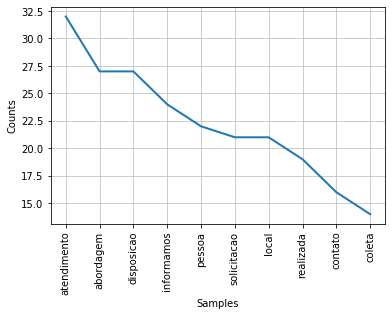

############## 1 ##############


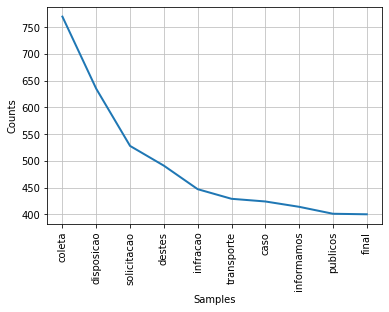

############## 2 ##############


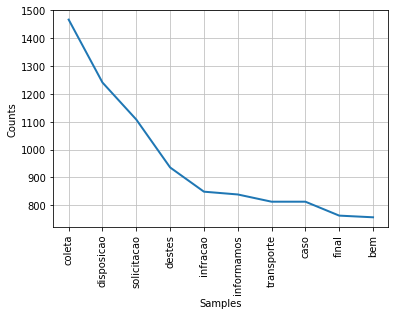

############## 3 ##############


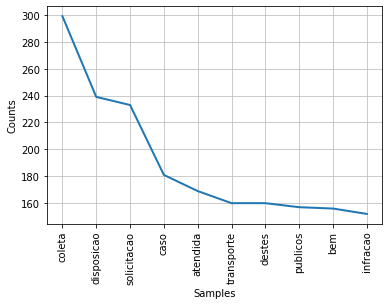

############## 4 ##############


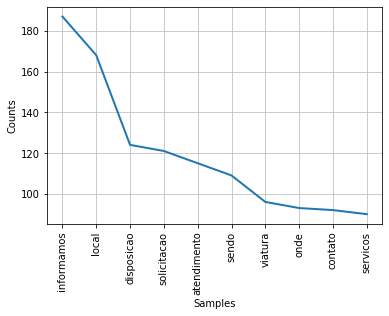

############## 5 ##############


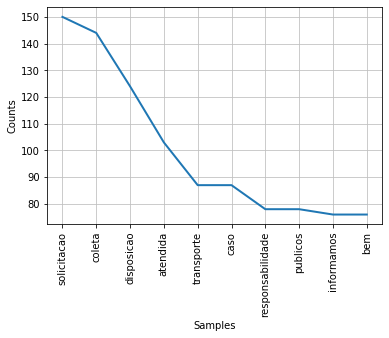

In [12]:
from nltk.probability import FreqDist

for grupo, texto in df_group.items():
    print("############## {} ##############".format(grupo))
    freqDist = FreqDist(texto.split(" "))
    freqDist.plot(10)

############## 0 ##############


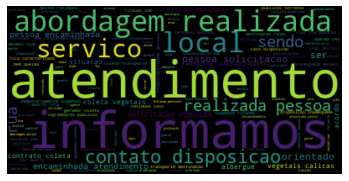

############## 1 ##############


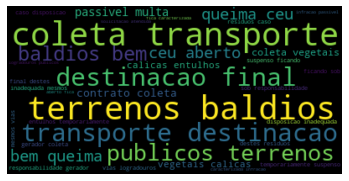

############## 2 ##############


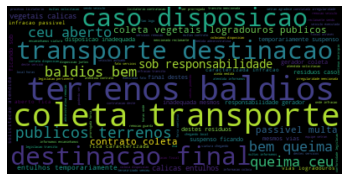

############## 3 ##############


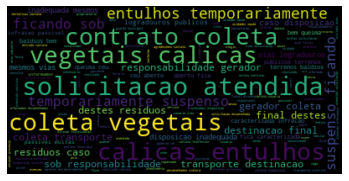

############## 4 ##############


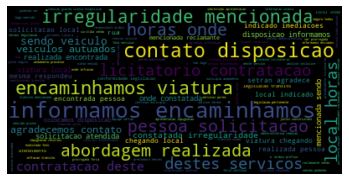

############## 5 ##############


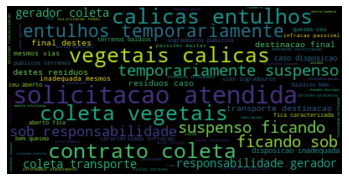

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for grupo, texto in df_group.items():
    print("############## {} ##############".format(grupo))
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(texto)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()